In [2]:
from imtools import *
import numpy as np

# TP1 Analyse Fonctionnelle

##  BEUNECHE Lilian

Lorsqu’un appareil (ordinateur, appareil photo…) crée une image il doit déterminer une valeur pour chacun des pixels. Des erreurs de mesure peuvent alors être réalisées.
A la suite de sa création, l’image pourra être modifiée par un utilisateur pour être éclaircie, assombrie, rendue plus précise ou alors allégée.

Nous allons étudier différentes de ces méthodes dans ce TP.


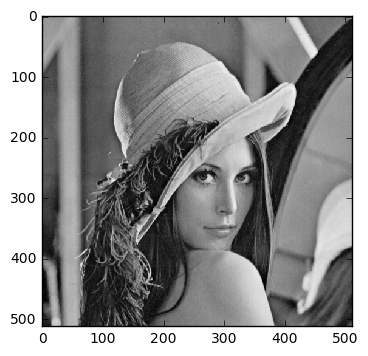

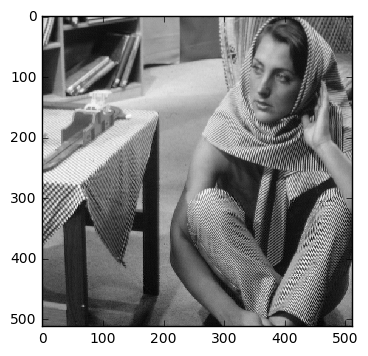

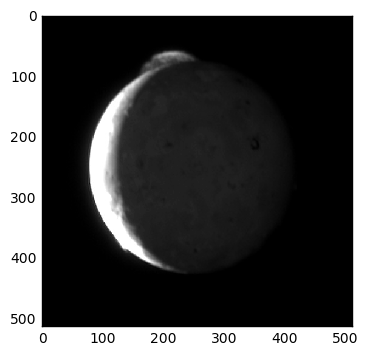

In [114]:
l = open_image ('lena.png')
b = open_image ('barbara.png')
io = open_image ('io.png')

display_image(l)
display_image(b)
display_image(io)

## Fenêtrage et échantillonage

lena.png sur la grille {235,...,295} x {240,...,300}

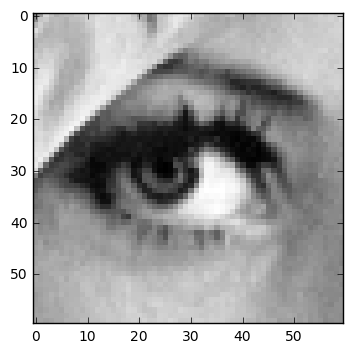

In [14]:
l = open_image ('lena.png')
display_image ( l[235:295, 240:300] )

Le fenêtrage de notre image ne sélectionne qu'une partie de celle initiale. Cela revient à multiplier la fonction caractéristique de l'image initiale par $\mathbf{1}_{[235; 295]x[240; 300]}$

barbara.png aux facteurs 2, 3, 4 et 5

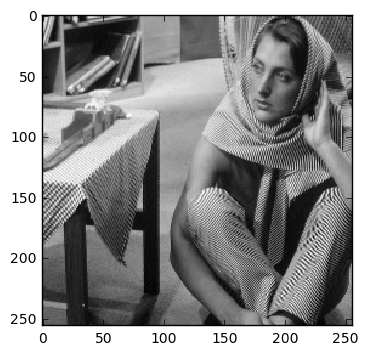

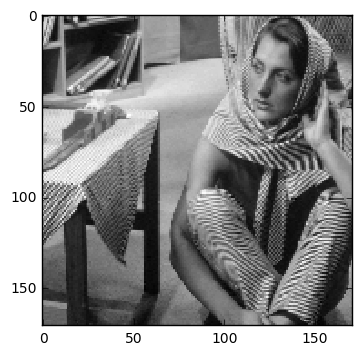

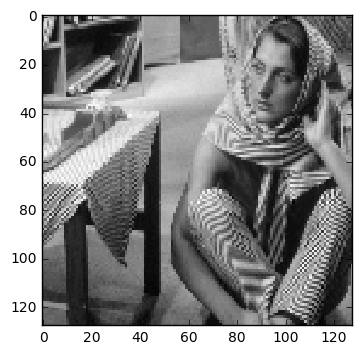

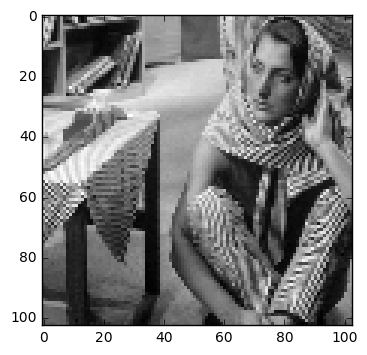

In [15]:
#Barbara avec echantillonage de 2
b2 = b[::2, ::2]
display_image( b2 )
#Barbara avec echantillonage de 3
b3 = b[::3, ::3]
display_image( b3 )
#Barbara avec echantillonage de 4
b4 = b[::4, ::4]
display_image( b4 )
#Barbara avec echantillonage de 5
b5 = b[::5, ::5]
display_image( b5 )

En effectuant l'échantillonnage de notre image, on ne conserve qu'une seule partie de l'information initiale. La qualité de l'image diminue plus le facteur augmente. On perd beaucoup de précision sur l'image. Cela est particulièrement visible pour les petits motifs (tels que le pantalon). En effet, la fréquence des motifs du pantalon est modifiée selon le facteur (particulièrement visible pour 3 et 5).

Cela revient ici à observer qualitativement le principe de Shannon. Pour que les motifs ne soient pas modifiés, il faut une fréquence d'échantillonnage 2 fois supérieure à la fréquence des motifs.
L’échantillonnage enlève donc de l’information. Cela permet par exemple de réduire le poids de l’image.

## Filtrage

Fonction moyenne(i, n) qui renvoie l'image obtenue en faisant la convolution de notre image avec une fenêtre carré de taille nxn. Puis affichage de la convolution avec des filtres de taille 2, 4, 6 et 8

In [17]:
def moyenne(i, n):
    N = i.shape[0]
    j = np.zeros(i.shape)
    #j.resize(i.shape)
    for x in range (i.shape[0]):
        for y in range (i.shape[0]):
    
            j[x, y] = round((np.sum(i[ x%N : (x+n) %N, y%N : (y+n)%N]))*(1./(n**2)))%255
    
    return j

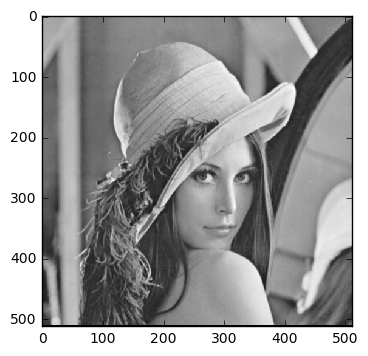

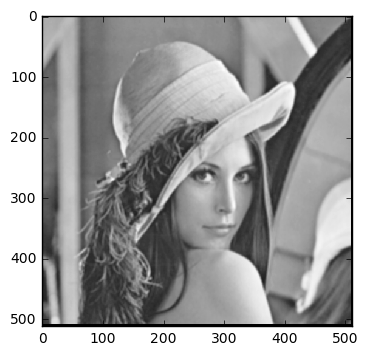

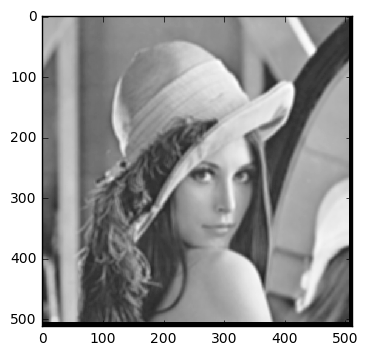

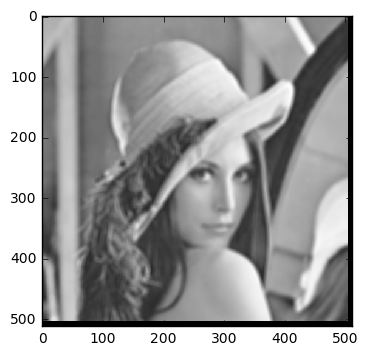

In [18]:
display_image(moyenne(l, 2))
display_image(moyenne(l, 4))
display_image(moyenne(l, 6))
display_image(moyenne(l, 8))

Lors de la création d'une image numérique, l'ordinateur ou l'appareil photo réalise une moyenne des données qu'il reçoit afin de déterminer la valeur à donner à chaque pixel. En effectuant une convolution, ici, on procède de la même façon puisqu'on réalise une "moyenne" de notre image. Cela revient à la flouter. On constate que plus la taille du filtre est élevée plus le flou est important.

Plus la taille de la fenêtre de convolution est grande plus on voit apparaitre une bordure noire en bas et sur les côtés. Celle-ci est due au fait qu'on utilise des valeurs hors de notre tableau initial pour réaliser la convolution. Notre fenêtre d'affichage ne changeant jamais, on peut donc faire la remarque que la taille de l'image diminue.

## Filtrage et échantillonnage

Fonction echantillonnage2x(i, n) qui convole avec une fenêtre de taille nxn puis sous-échantillonne d'un facteur 2.

In [99]:
def echantillonnage2x(i, n):
    N = i.shape[0]
    j = np.zeros(i.shape)
    for x in range (i.shape[0]):
        for y in range (i.shape[0]):
    
            j[x, y] = round((np.sum(i[ x%N : (x+n) %N, y%N : (y+n)%N]))*(1./(n**2)))%255
    
    j2 = j[::2, ::2]
    return j2

Test avec barbara.png.

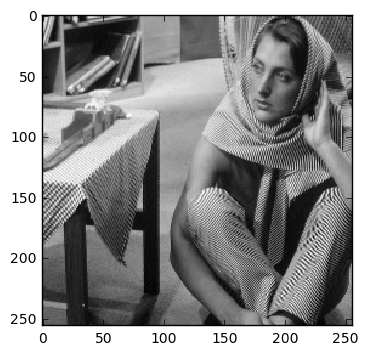

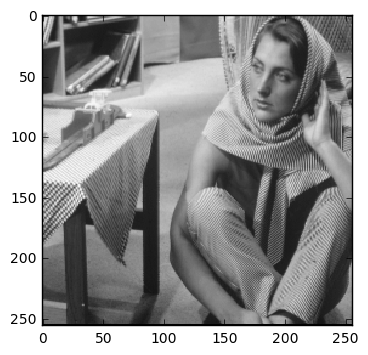

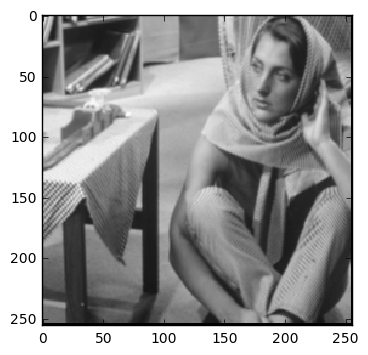

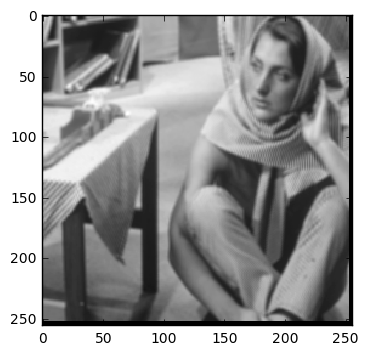

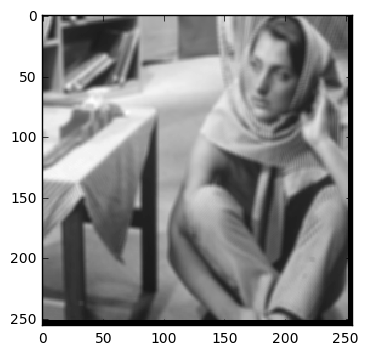

In [100]:
display_image(echantillonnage2x(b, 1))
display_image(echantillonnage2x(b, 2))
display_image(echantillonnage2x(b, 4))
display_image(echantillonnage2x(b, 6))
display_image(echantillonnage2x(b, 8))

Pour un sous-échantillonnage de facteur 2, on privilégiera une taille 2 pour la fenêtre. En effet, avec l'échantillonnage de facteur 2 nous perdons l'information d'un pixel sur 2. C'est cela qui fait apparaitre des rayures sur nos images. En faisant une convolution de taille 2 au préalable, on transmet l'information des pixels à leurs voisins. L'information enlevée par la suite est donc en partie préservée par les pixels alentours.

De la même façon, si on effectue un sous-échantillonnage de facteur 3, il faut convoler avec une taille 3 pour que l'information soit répartie sur plusieurs pixel et ainsi en perdre le moins possible.

## Bruit

Fonction bruitage(i, signa) qui rajoute un bruit gaussien à l'image

In [101]:
def bruitage(i, sigma):
    N = i.shape[0]
    conv =  np.zeros(i.shape)
    conv = np.random.normal(0, sigma, size=(N, N))
    j = i+conv
    return j

Test avec barbara.png

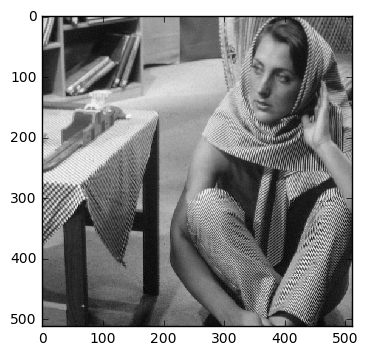

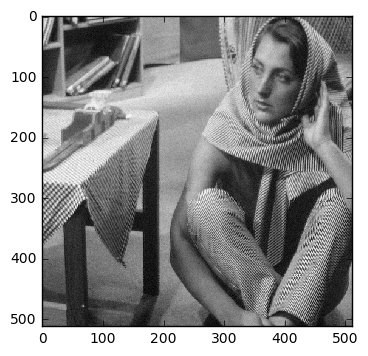

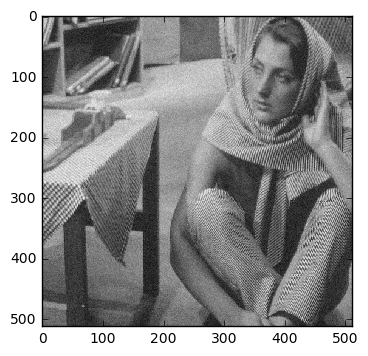

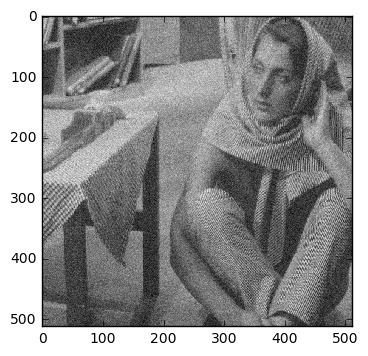

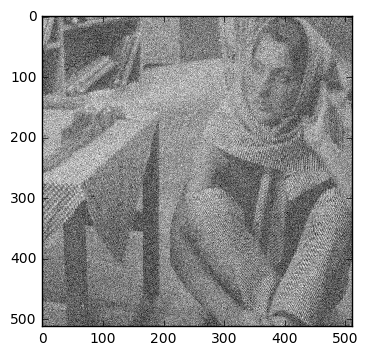

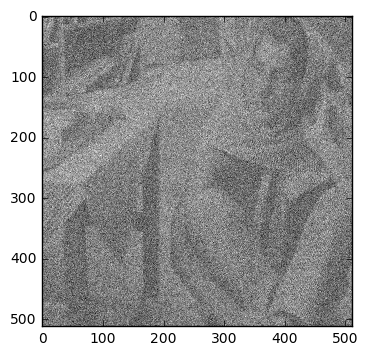

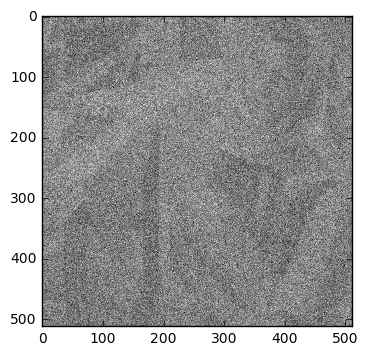

In [102]:
display_image(bruitage(b, 2))
display_image(bruitage(b, 5))
display_image(bruitage(b, 10))
display_image(bruitage(b, 20))
display_image(bruitage(b, 40))
display_image(bruitage(b, 80))
display_image(bruitage(b, 160))

Lorsque l'on crée une image, celle-ci est réalisée avec une certaine incertitude. Elle est aléatoire et peut donc être modélisée par l'ajout à notre image d'un bruit gaussien. On constate que plus l'écart-type du bruit gaussien est élevé, moins l'image est reconnaissable, au point de ne plus l'être du tout à un moment (ici, autour de $\sigma = 100$). En effet, plus σ est élevé, plus la gaussienne de notre bruit est étalée, donc prend plus de valeurs possibles, dont certaines pouvant être très élevée ramenant la valeur des pixels proches de 0 ou de 255.

Pour $\sigma > 160$, l'image n'est presque plus qu'un ensemble de pixels ayant chacun une valeur aléatoire et l'image d'origine est totalement absorbée.


## Quantification à pas constant

Quantification grâce à la fonction display_image

In [103]:
def quantify1(i, n):
    j= np.zeros(i.shape)
    for x in range (i.shape[0]):
        for y in range (i.shape[0]):
            j[x, y] = (i[x, y]/255)*n
            j[x, y] = np.round((i[x, y]/255)*n) *255/n
    return j

Test avec barbara.png

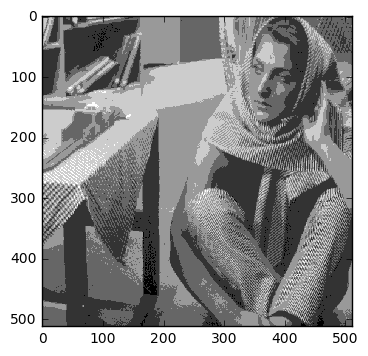

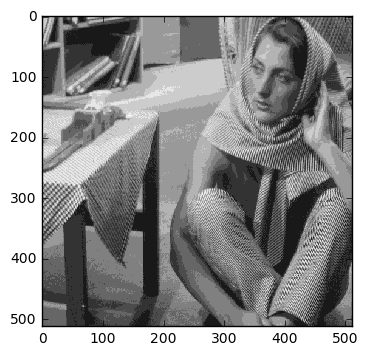

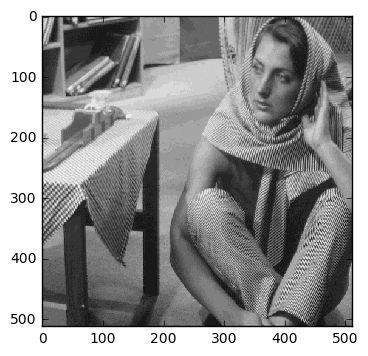

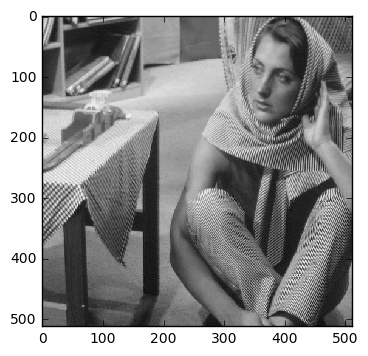

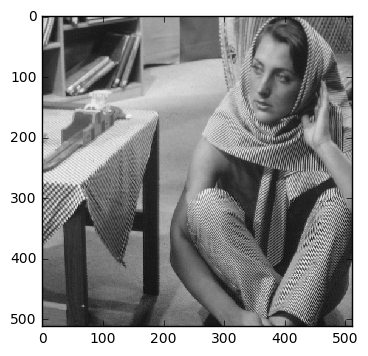

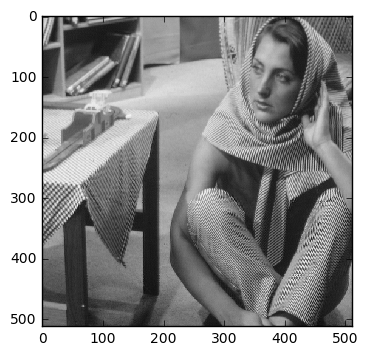

In [104]:
display_image(quantify1(b, 5), vmin = 0, vmax=255)
display_image(quantify1(b, 10), vmin = 0, vmax=255)
display_image(quantify1(b, 20), vmin = 0, vmax=255)
display_image(quantify1(b, 40), vmin = 0, vmax=255)
display_image(quantify1(b, 80), vmin = 0, vmax=255)
display_image(quantify1(b, 160), vmin = 0, vmax=255)

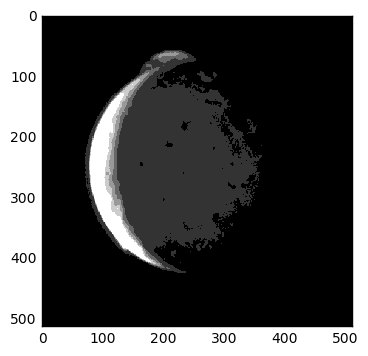

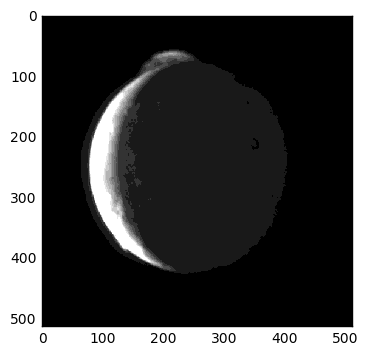

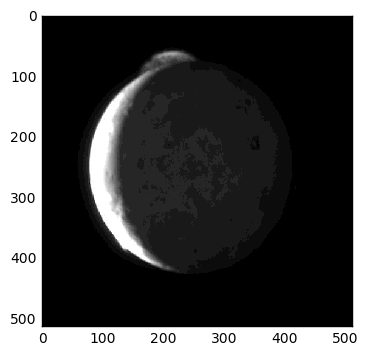

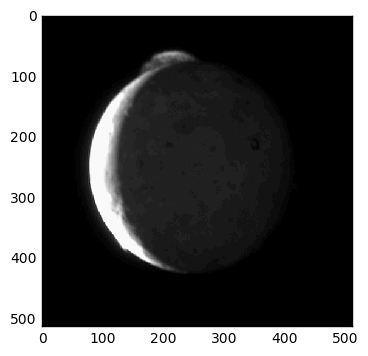

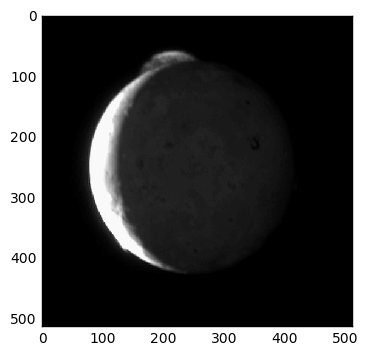

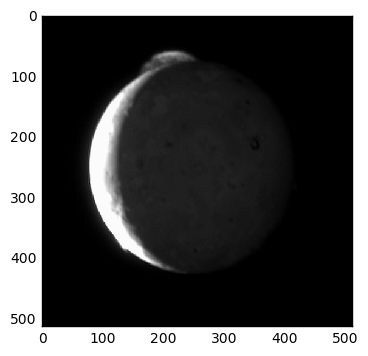

In [105]:
display_image(quantify1(io, 5), vmin = 0, vmax=255)
display_image(quantify1(io, 10), vmin = 0, vmax=255)
display_image(quantify1(io, 20), vmin = 0, vmax=255)
display_image(quantify1(io, 40), vmin = 0, vmax=255)
display_image(quantify1(io, 80), vmin = 0, vmax=255)
display_image(quantify1(io, 160), vmin = 0, vmax=255)

La quantification de l'image consiste à donner à chaque pixel (ou groupe de pixels) une valeur entière. A l’origine, chaque pixel de l'image peut prendre un très grand nombre de valeurs. Lors de la quantification, plusieurs vont être regroupées sous une même valeur numérique entière. Une quantification au niveau 2 ferait que notre image ne serait plus formée que par des pixels soit tout noir, soit tout blanc.

Pour des niveaux très faibles, l'image n'est pas du tout représentative de la réalité alors qu'en augmentant le niveau de quantification on se rapproche de l'image initiale qui contenait un très grand nombre de nuances de gris. On peut particulièrement remarquer sur l'image lena qu'à un certain niveau (n = 20) il se forme une segmentation des couleurs (particulièrement visible sur le sol). Les différentes nuances de gris se retrouvent séparées et forme des couches.

Pour l'image io, la quantification influe beaucoup moins sur l'image. En effet, l’originale est principalement constituée de pixels blancs ou noirs. La quantification n'est visible que pour des niveaux très faibles et joue un rôle beaucoup plus faible que pour lena.

La quantification peut être très utile pour alléger le poids d'une image ou améliorer sa précision. Cependant il ne sert à rien d'augmenter le niveau de quantification indéfiniment. Les écrans sont pour la plupart limités dans les tons qu'ils peuvent afficher. Il en est de même pour l'œil humain qui ne détecte qu'un nombre fini de nuances.

## Egalisation d'histogramme

Fonction histogramme qui donne l'histogramme cumulé d'une image sous la forme d'un tableau unidimensionnel de 256 éléments.

In [106]:
def histogramme (i):
    histo = np.zeros(256)
    N=i.shape[0]
    for x in range(0,N):
        for y in range(0,N): 
            histo[int(i[x,y])]+=1

    histo_cumule=np.zeros(256)
    for j in range(1,255):
        histo[j]+=histo[j-1]
   
    return histo

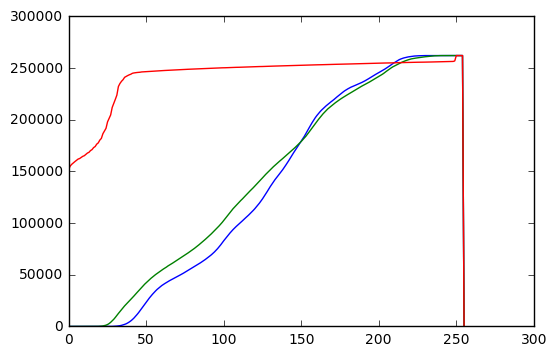

In [107]:
plt.plot(histogramme(l))
plt.plot(histogramme(b))
plt.plot(histogramme(io))



Fonction egalise

In [108]:
def egalise(i):
    new_image=np.zeros((i.shape[0], i.shape[1]))
    histo_cumule=histogramme(i)
    N=i.shape[0]
    for x in range(i.shape[0]):
            for y in range(i.shape[1]):
                new_image[x,y]=int(histo_cumule[int(i[x,y])]*255./(N**2))        
    return new_image

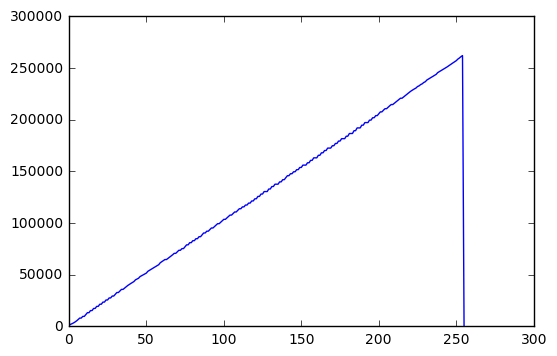

In [112]:
plt.plot(histogramme(egalise(l)))

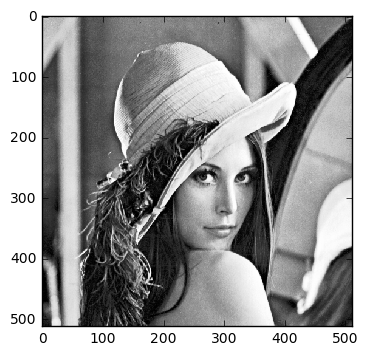

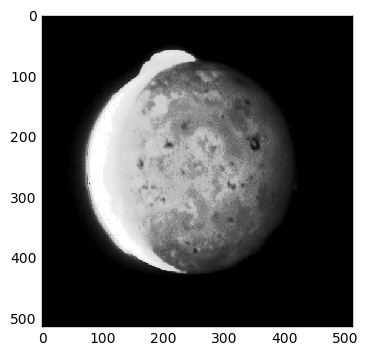

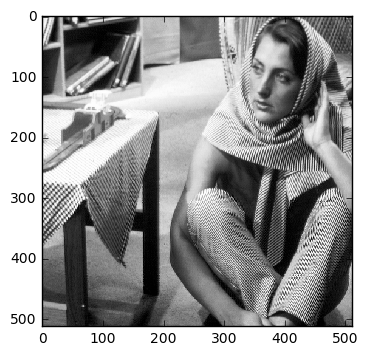

In [113]:
display_image(egalise(l))
display_image(egalise(io))
display_image(egalise(b))

L'histogramme permet de visualiser les niveaux de gris les plus utilisés dans une image. Grâce à l'égalisation de cet histogramme nous avons la possibilité de modifier notre image en donnant à chaque teinte le même poids. On constate cela grâce à l'histogramme cumulé après égalisation qui forme une droite. Il y a donc le même nombre de pixel pour chaque valeur possible. Les tons clairs sont présents de la même façon que les tons foncés ou intermédiaires.

La lune de l'image io est elle beaucoup plus claire que dans l'image originale. On remarque donc mieux les nuances et les détails qui la compose. Pour lena et barbara, les deux images sont éclaircies. On en déduit qu’elles étaient avec des tons particulièrement foncés à l’origine.

L'égalisation d'histogramme permet donc d'éviter que certaines teintes ne prennent le dessus sur d'autres et met donc en avant certains détails peu visibles dans l'image d'origine.


## Quantification à pas variable

Fonction quantify2 qui effectue une quantification de l'image en la découpant en n niveau grâce à l'histogramme réalisé précédemment.

In [115]:
def quantify2(i, n):
    return quantify1(egalise(i), n)   

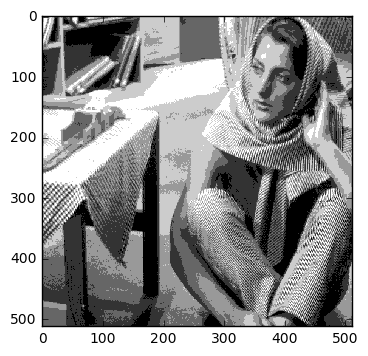

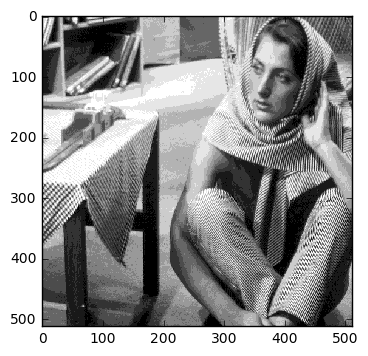

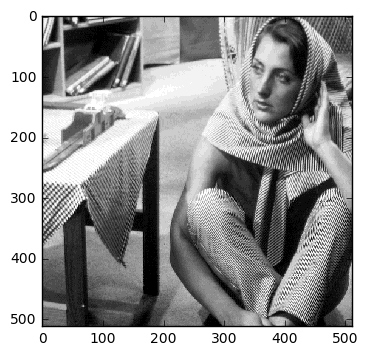

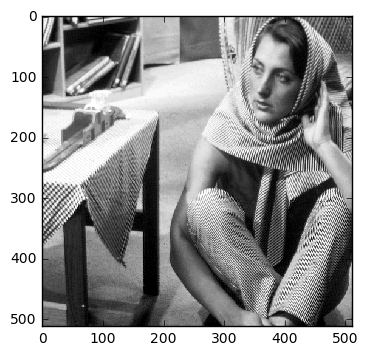

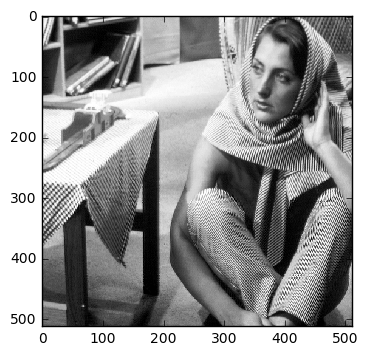

In [118]:
display_image(quantify2(b, 5))
display_image(quantify2(b, 10))
display_image(quantify2(b, 20))
display_image(quantify2(b, 40))
display_image(quantify2(b, 80))

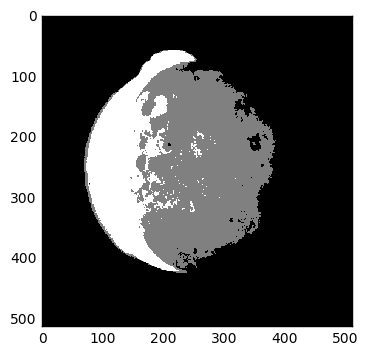

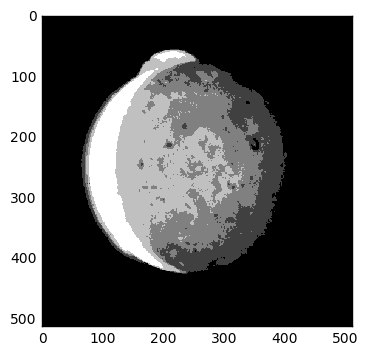

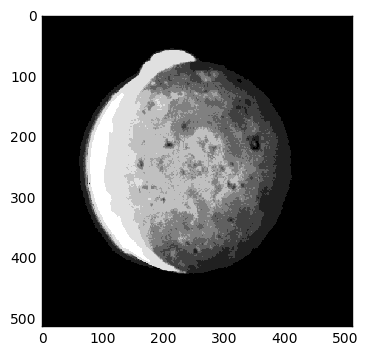

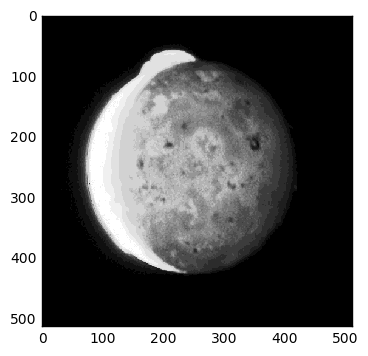

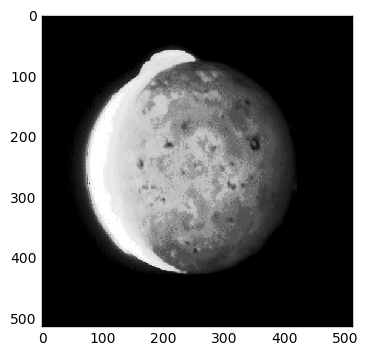

In [119]:
display_image(quantify2(io, 5))
display_image(quantify2(io, 10))
display_image(quantify2(io, 20))
display_image(quantify2(io, 40))
display_image(quantify2(io, 80))

Effectuer une égalisation de notre image avant la quantification permet d'éviter une trop grande dégradation de notre image d'origine. Celle-ci peut par exemple être particulièrement sombre. La quantification ne ferait donc qu'amplifier cela. En réalisant une égalisation au préalable on évite que l'image ne soit rendue illisible.